In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

In [4]:
tol_LF1_f1 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f1_y20_n3_diag0_full_withpbs_LF-1_rtol1e-04_nrlz10.npy'), name = 'LF-1')
tol_LF2_f1 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f1_y20_n3_diag0_full_withpbs_LF-2_rtol1e-04_nrlz10.npy'), name = 'LF-2')
tol_MF1_f1 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f1_y20_n3_diag0_full_withpbs_MF-1_rtol1e-04_nrlz10.npy'), name = 'MF-1')
tol_MF2_f1 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f1_y20_n3_diag0_full_withpbs_MF-2_rtol1e-04_nrlz10.npy'), name = 'MF-2')
tol_HF1_f1 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f1_y20_n3_diag0_full_withpbs_HF-1_rtol1e-04_nrlz10.npy'), name = 'HF-1')
tol_HF2_f1 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f1_y20_n3_diag0_full_withpbs_HF-2_rtol1e-04_nrlz10.npy'), name = 'HF-2')
df_f1 = pd.concat([tol_LF1_f1, tol_LF2_f1, tol_MF1_f1, tol_MF2_f1, tol_HF1_f1, tol_HF2_f1], axis = 1)
df_f1

,LF-1,LF-2,MF-1,MF-2,HF-1,HF-2
0,0.000000,1.000000,2.00000,3.000000,4.000000,5.000000
1,-3.750000,-1.093750,-1.40625,-1.328125,-4.921875,-0.468750
2,1.484375,2.890625,2.03125,0.703125,1.640625,1.171875


In [5]:
tol_LF1_f2 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f2_y20_n3_diag0_full_withpbs_LF-1_rtol1e-04_nrlz10.npy'), name = 'LF-1')
tol_LF2_f2 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f2_y20_n3_diag0_full_withpbs_LF-2_rtol1e-04_nrlz10.npy'), name = 'LF-2')
tol_MF1_f2 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f2_y20_n3_diag0_full_withpbs_MF-1_rtol1e-04_nrlz10.npy'), name = 'MF-1')
tol_MF2_f2 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f2_y20_n3_diag0_full_withpbs_MF-2_rtol1e-04_nrlz10.npy'), name = 'MF-2')
tol_HF1_f2 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f2_y20_n3_diag0_full_withpbs_HF-1_rtol1e-04_nrlz10.npy'), name = 'HF-1')
tol_HF2_f2 = pd.Series(np.load('bandpass_tolerance/ph2_tolerance_f2_y20_n3_diag0_full_withpbs_HF-2_rtol1e-04_nrlz10.npy'), name = 'HF-2')
df_f2 = pd.concat([tol_LF1_f2, tol_LF2_f2, tol_MF1_f2, tol_MF2_f2, tol_HF1_f2, tol_HF2_f2], axis = 1)
df_f2

,LF-1,LF-2,MF-1,MF-2,HF-1,HF-2
0,0.000000,1.000,2.000000,3.000000,4.000000,5.000000
1,-4.296875,-0.625,-0.156250,-0.078125,-0.546875,0.000000
2,0.781250,3.125,0.234375,0.078125,0.390625,0.078125


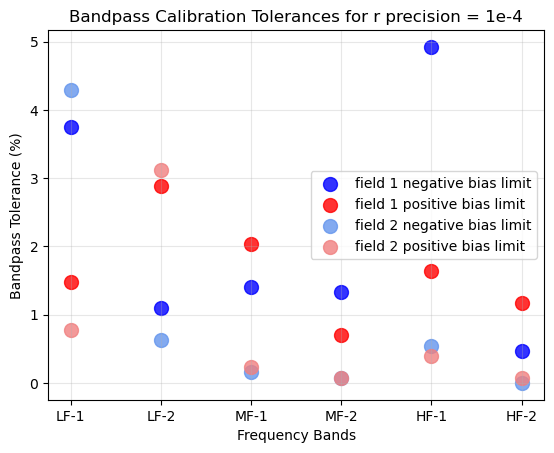

In [6]:
bands = ['LF-1', 'LF-2', 'MF-1', 'MF-2', 'HF-1', 'HF-2']

f1_neg = df_f1.iloc[1]
f1_pos = df_f1.iloc[2]
f2_neg = df_f2.iloc[1]
f2_pos = df_f2.iloc[2]

plt.scatter(range(len(bands)), abs(f1_neg), color='blue', alpha=0.8, s=100, label = 'field 1 negative bias limit', marker='o')
plt.scatter(range(len(bands)), f1_pos, color='red', alpha=0.8, s=100, label = 'field 1 positive bias limit', marker='o')
plt.scatter(range(len(bands)), abs(f2_neg), color='cornflowerblue', alpha=0.8, s=100, label = 'field 2 negative bias limit', marker='o')
plt.scatter(range(len(bands)), f2_pos, color='lightcoral', alpha=0.8, s=100, label = 'field 2 positive bias limit', marker='o')

plt.xlabel('Frequency Bands')
plt.ylabel('Bandpass Tolerance (%)')
plt.title('Bandpass Calibration Tolerances for r precision = 1e-4')
plt.xticks([0, 1, 2, 3, 4, 5],['LF-1', 'LF-2', 'MF-1', 'MF-2', 'HF-1', 'HF-2'])
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [7]:
all_ghz = pd.DataFrame(np.load('bandpass_tolerance/ph2_tolerance_f1_y20_n3_diag0_full_withpbs_all-ghz_rtol1.0e-04_nrlz10.npy'))
all_ghz

,0
0,-4.755859
1,3.359375


In [8]:
all_ghz_f2 = pd.DataFrame(np.load('bandpass_tolerance/ph2_tolerance_f2_y20_n3_diag0_full_withpbs_all-ghz_rtol1.0e-04_nrlz10.npy'))
all_ghz_f2

,0
0,-1.416016
1,5.000000


In [9]:
params_withpbs = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_full_withpbs_diag0_V.npy').T
df_withpbs = pd.DataFrame(params_withpbs, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])
df_withpbs.describe()

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Delta_s
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.0,381.714271,0.000166,14.227285,-0.802280,1.650214,1.066390,-0.958628,-3.092062,0.023610,0.999245,0.999204
std,0.0,26.224790,0.000338,0.553585,0.042979,0.006661,0.016967,0.053574,0.012838,0.011455,0.000286,0.000345
min,0.0,324.281333,-0.000697,13.695381,-0.868954,1.634985,1.036837,-1.098730,-3.131237,-0.009709,0.998492,0.998057
25%,0.0,363.735795,-0.000061,13.732275,-0.844251,1.644909,1.055063,-0.985597,-3.101572,0.016290,0.999070,0.998961
50%,0.0,379.179260,0.000143,13.746824,-0.782347,1.649566,1.063570,-0.953582,-3.092287,0.024818,0.999207,0.999228
75%,0.0,400.976105,0.000389,14.813861,-0.769109,1.655580,1.072905,-0.921557,-3.083610,0.030871,0.999429,0.999461
max,0.0,446.847820,0.001115,15.140416,-0.683970,1.663871,1.123615,-0.857151,-3.063550,0.049600,1.000075,0.999996


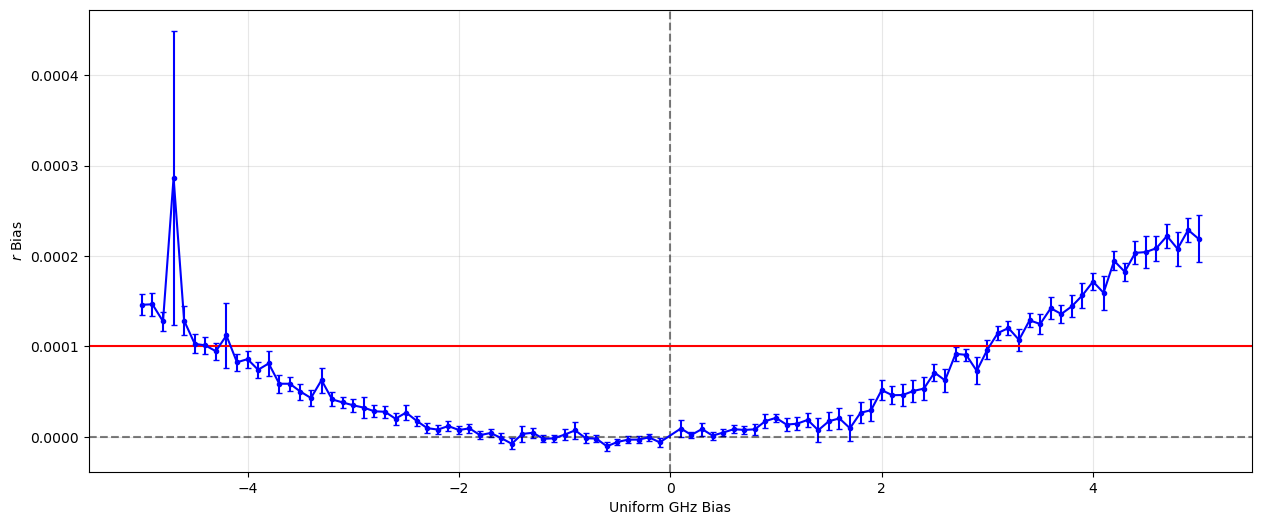

r bias range: -0.000011 to 0.000287
Successful realizations: 99-100
-5.0 0.00014599609002784902
-4.9 0.00014656490630721817
-4.8 0.00012769021466557074
-4.7 0.0002865734968922061
-4.6 0.0001284518482267335
-4.5 0.00010278567612930342
-4.4 0.00010113520801219938
-4.3 9.463761774610748e-05
-4.2 0.00011204867384741886
-4.1 8.237266690480923e-05
-4.0 8.588106920867585e-05
-3.9 7.410997796487264e-05
-3.8 8.110651567371004e-05
-3.7 5.8659083914992266e-05
-3.6 5.8660551051835724e-05
-3.5 4.998702138359789e-05
-3.4 4.2892978532312845e-05
-3.3 6.269142663895787e-05
-3.2 4.1329772848298606e-05
-3.1 3.796888283324758e-05
-3.0 3.480583669182924e-05
-2.9 3.2218808282286685e-05
-2.8 2.8174416744962448e-05
-2.7 2.765216111020726e-05
-2.6 1.993822231069296e-05
-2.5 2.6789107457761277e-05
-2.4 1.7628516056340945e-05
-2.3 9.548518563018391e-06
-2.2 7.947805246870288e-06
-2.1 1.1824505760774236e-05
-2.0 7.470989731704301e-06
-1.9 9.289567370411805e-06
-1.8 1.7912429685737737e-06
-1.7 4.198837308797217e-0

In [12]:
unbiased_params = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_full_withpbs_diag0_V.npy').T
df_unbiased = pd.DataFrame(unbiased_params, columns=['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])

ghz_biases = []
mean_r_biases = []
std_r_biases = []
n_successful = []

for filename in glob.glob('mlsearch_bandpass_ghz/ph2_mlsearch_f1_y20_n3_diag0_full_withpbs_uniform_*GHz.npy'):
    match = re.search(r'uniform_([-+]?\d+\.\d+)GHz\.npy', filename)
    if match:
        ghz_bias = float(match.group(1))
        params = np.load(filename).T
        df_biased = pd.DataFrame(params, columns=['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])
        success_mask = (df_unbiased['status'] == 0) & (df_biased['status'] == 0)
        r_unbiased_success = df_unbiased.loc[success_mask, 'r'].values
        r_biased_success = df_biased.loc[success_mask, 'r'].values
        r_bias = r_biased_success - r_unbiased_success
        
        ghz_biases.append(ghz_bias)
        mean_r_biases.append(np.mean(r_bias))
        std_r_biases.append(np.std(r_bias))
        n_successful.append(len(r_bias))
      
ghz_biases = np.array(ghz_biases)
mean_r_biases = np.array(mean_r_biases)
std_r_biases = np.array(std_r_biases)
n_successful = np.array(n_successful)

sorted_idx = np.argsort(ghz_biases)
ghz_biases = ghz_biases[sorted_idx]
mean_r_biases = mean_r_biases[sorted_idx]
std_r_biases = std_r_biases[sorted_idx]
n_successful = n_successful[sorted_idx]

plt.figure(figsize=(15, 6))
plt.errorbar(ghz_biases, mean_r_biases, yerr=std_r_biases/np.sqrt(n_successful), fmt='b.-', capsize = 2)
plt.xlabel('Uniform GHz Bias')
plt.ylabel('$r$ Bias')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.axhline(y=0.0001, color = 'red')
plt.show()

print(f"r bias range: {mean_r_biases.min():.6f} to {mean_r_biases.max():.6f}")
print(f"Successful realizations: {n_successful.min()}-{n_successful.max()}")

for i in range(100):
    print(ghz_biases[i], mean_r_biases[i])

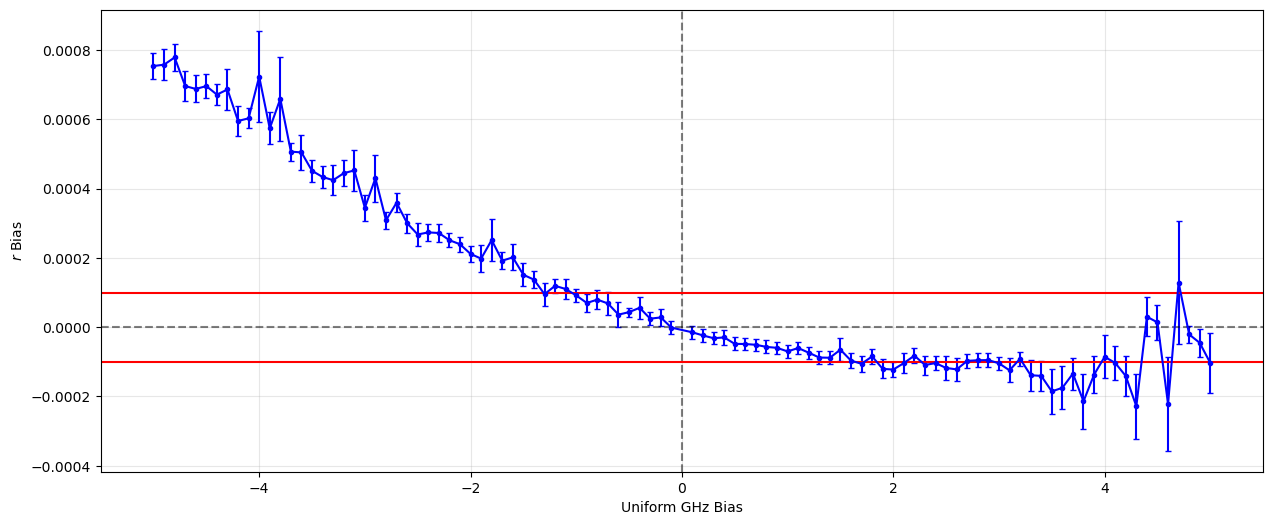

r bias range: -0.000228 to 0.000778
Successful realizations: 97-99
-5.0 0.0007534404535008498
-4.9 0.0007573820406106028
-4.8 0.0007782460809503901
-4.7 0.0006957297350901768
-4.6 0.00068734404967301
-4.5 0.0006955625145085374
-4.4 0.0006709818603914092
-4.3 0.0006858400259778929
-4.2 0.0005949590248350907
-4.1 0.0006025786999024241
-4.0 0.0007231113000587812
-3.9 0.0005733993949304765
-3.8 0.0006588821760285131
-3.7 0.0005064042848741671
-3.6 0.00050427782049517
-3.5 0.0004511582794836961
-3.4 0.00043336958774569154
-3.3 0.0004240965776175173
-3.2 0.00044424996484851816
-3.1 0.0004522860433916518
-3.0 0.00034441004608553574
-2.9 0.00042999541144450826
-2.8 0.0003082823868567306
-2.7 0.00035903508548933036
-2.6 0.00030009962097142225
-2.5 0.00026735615217123374
-2.4 0.0002734795023578729
-2.3 0.00027169077502965005
-2.2 0.0002509729475471406
-2.1 0.0002392940197247556
-2.0 0.00021134117707986751
-1.9 0.00019783654276595423
-1.8 0.00025125922264870117
-1.7 0.00019187079820050796
-1.6 0.

In [13]:
unbiased_params = np.load('mlsearch/ph2_mlsearch_f2_y20_n3_diag0_full_withpbs.npy').T
df_unbiased = pd.DataFrame(unbiased_params, columns=['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])

ghz_biases = []
mean_r_biases = []
std_r_biases = []
n_successful = []

for filename in glob.glob('mlsearch_bandpass_ghz/ph2_mlsearch_f2_y20_n3_diag0_full_withpbs_uniform_*GHz.npy'):
    match = re.search(r'uniform_([-+]?\d+\.\d+)GHz\.npy', filename)
    if match:
        ghz_bias = float(match.group(1))
        params = np.load(filename).T
        df_biased = pd.DataFrame(params, columns=['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])
        success_mask = (df_unbiased['status'] == 0) & (df_biased['status'] == 0)
        r_unbiased_success = df_unbiased.loc[success_mask, 'r'].values
        r_biased_success = df_biased.loc[success_mask, 'r'].values
        r_bias = r_biased_success - r_unbiased_success
        
        ghz_biases.append(ghz_bias)
        mean_r_biases.append(np.mean(r_bias))
        std_r_biases.append(np.std(r_bias))
        n_successful.append(len(r_bias))
      
ghz_biases = np.array(ghz_biases)
mean_r_biases = np.array(mean_r_biases)
std_r_biases = np.array(std_r_biases)
n_successful = np.array(n_successful)

sorted_idx = np.argsort(ghz_biases)
ghz_biases = ghz_biases[sorted_idx]
mean_r_biases = mean_r_biases[sorted_idx]
std_r_biases = std_r_biases[sorted_idx]
n_successful = n_successful[sorted_idx]

plt.figure(figsize=(15, 6))
plt.errorbar(ghz_biases, mean_r_biases, yerr=std_r_biases/np.sqrt(n_successful), fmt='b.-', capsize = 2)
plt.xlabel('Uniform GHz Bias')
plt.ylabel('$r$ Bias')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.axhline(y=0.0001, color = 'red')
plt.axhline(y=-0.0001, color = 'red')
plt.show()

print(f"r bias range: {mean_r_biases.min():.6f} to {mean_r_biases.max():.6f}")
print(f"Successful realizations: {n_successful.min()}-{n_successful.max()}")
for i in range(100):
    print(ghz_biases[i], mean_r_biases[i])